<a href="https://colab.research.google.com/github/alfredoaguiararce/self-driving-car-development/blob/main/Computer%20Vision/Manipulaci%C3%B3n_del_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep learning y visión por computadora 

Los algoritmos que aqui se presentan forman parte del Capitulo 2 del libro `Applied Deep Learning and Computer Vision for Self-Driving cars`.


### Vision por computadora para los automoviles autonomos.


En los siguientes pasos, se convertira una imagen a color a una escala de grises usando la liberia OpenCV.


#### Convertir de RGB a escala de grises con OpenCV.

En esta seccion se utiliza la libreria OpenCV para convertir una imagen a escala de grises. Concretamente tomaremos una imagen de una carretera, y la convertiremos a escala de grises.

(159, 318, 3)

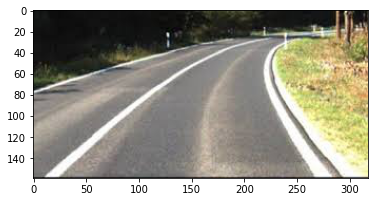

In [68]:
# 1.- importamos la liberia matplotlib, numpy y opencv.
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 2.- Ahora importamos la imagen para la operacion.
from skimage import io # Dado que se esta trayendo una imagen externa se agrega la libreria para descargar la imagen
url = "https://drive.google.com/uc?export=view&id=1ISLSJ1w3LvvXuytYT82MbxOXLmiuVFRw"
image_color = io.imread(url) 
plt.imshow(image_color) # La imprimimos.

# 3.- Esta imagen deberia tener tres canales porque es el formato RGB.
image_color.shape # Mostramos la matriz de la imagen.

(159, 318)

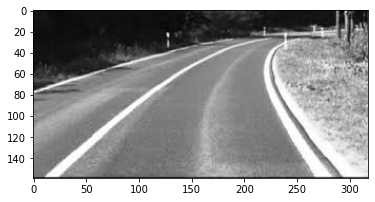

In [69]:
# 4.- Con ayuda de OpenCV pasaremos a escala de grises la imagen.
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

# 5.- Dado que las imagenes en escala de grises unicamente usan los canales para los colores blanco y negro. 
image_gray.shape # Mostramos los canales de la imagen en blanco y negro.

In [70]:
# Este codigo nos ayudara a mostrar la matriz completa de la imagen.
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#image_gray

#### Detectar caminos con imagenes a blanco y negro

En esta seccion manipularemos la imagen para resaltar las secciones blancas del camino. Comenzando por detectar estas secciones en la imagen a escala de grises de la seccion anterior.

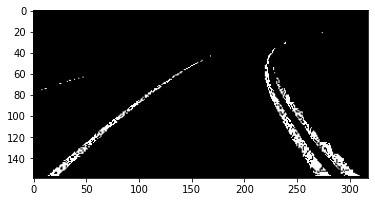

In [71]:
# Deteccion con imagen a escala de grises.
# 1.- En la imagen anterior tratada a escala de grises aplicaremos un filtro para identificar los pixeles blancos de la imagen.
image_copy = np.copy(image_gray) # Realizamos una copia de la imagen para no afectarla directamente.

# Cualquier valor de la imagen que no es blanco.
image_copy[ (image_copy[:,:] < 250) ] = 0

# 2.- Una vez que se aplico este filtro mostramos la imagen.
plt.imshow(image_copy, cmap='gray')
plt.show()

#### Detectar caminos con imagenes RGB.

Podemos obtener imagenes mas nitidas de las lienas de los caminos cuando obtenemos estas de imagenes a color. Como se podra ver a continuacion, las imagenes a color muestran una mejor resolucion, que las imagenes a blanco y negro, eso es porque las imagenes a color tienen mas informacion que las imagenes a blanco y negro.

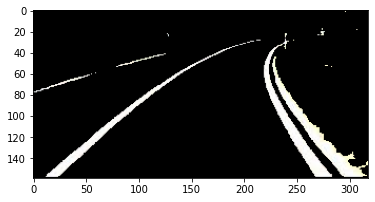

In [72]:
# Copiamos la imagen a color para no modificarla directamente.
image_copy = np.copy(image_color)

# Aplicaremos el siguiente filtro.
image_copy[ (image_copy[:,:, 0] < 209) | (image_copy[:,:, 1] < 200) | (image_copy[:,:, 2] < 200) ] = 0

# Mostramos la imagen 
plt.imshow(image_copy, cmap='gray')
plt.show()

> 💡 `Nota importante`: Tanto en el filtro en escala de grises como en el filtro a color, nosotros modificamos los canales respectivos de la imagen, enviando a 0 todo aquel color que no fuera blanco. En una `escala` en donde 0 es negro y 255 es totalmente blanco. 
La desventaja de este metodo vendria a ser lo facil que resulta replicar, dado que una diferente iluminacion o imagen requiere diferentes valores a los establecidos en los filtros para aproximar los resultados buscados.

### Retos en las tecnicas de seleccion del color

El espacio de colores es un modelo matematicp que describe el rango de los colores en las imagenes.

Como vimos en la seccion anterior nosotros estuvimos extrayendo un color especifico de una imagen a escala de grises y a color, de esta manera obteniamos los pixeles correspondientes a las lineas blancas en los caminos. Sin embargo esto nos genero las siguientes preguntas:



*   ¿Que pasa si las lineas del camino no son de color blanco?
*   ¿Que ocurre con una iluminacion diferente por ejemplo durante la noche?

Estos son algunos de los retos a los que se enfrentan los vehiculos autonomos.Algunas maneras en las que se enfrentan estos problemas son las siguientes:

*   Podemos usar tecnicas avanzadas de vision por computadora para extraer ,as informacion de las imagenes, como podria ser la deteccion de bordes o `edge detection`, que cubriremos mas adelante.
*   Podemos usar un LIDAR para crear un mapa digital de alta resolucion en 3D. Durante las condiciones ideales del clima, el LIDAR puede recopilar informacion de hasta 2.8 millones de puntos por segundo recabados por un laser. Este nivel de detalle es de ayuda cuando el clima no presenta condiciones optimas como puede ser durante un clima lluvioso. Basicamente el LIDAR puede detectar objetos cuando la vision artifial falla.





#### Manipulación del espacio del color.

A continuacion, se muestra una metodologia para convertir RGB a HSV y RGB a escala de grises usando OpenCV.

#### El espacio RGB.

Esta es quizas el espacio de colores mas popular y representa los colores en terminos de Rojo, Verde y Azul. Por sus siglas en ingles RedGreenBlue(RGB). Cada uno de estos canales puede tomar un valor entre 0 y 255.


![RGB SPACE](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/RGB_Cube_Show_lowgamma_cutout_b.png/800px-RGB_Cube_Show_lowgamma_cutout_b.png)

#### El espacio HSV.

Por otro lado el espacio HSV es preferible a RGB cuando se llevan acabo tareas analiticas, porque describe los colores de manera cercana a nuestra percepcion humana de los colores. 

![HSV](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/HSV_color_solid_cylinder_saturation_gray.png/800px-HSV_color_solid_cylinder_saturation_gray.png)

Por sus siglas en ingles HSV representa los colores en terminos de Hue(matiz) valor de entre `0-360`, Saturation (saturacion) valores de entre `0-255` y Value que representa el brillo o intensidad en valores de entre `0-255`

Los valores para cada color varian entre RGB y HSV por ejemplo:

*   🔴 `Color rojo`: el color rojo en escala RGB tiene el valor `(255, 0, 0)`. Mientras que en la escala HUE `(0, 100, 100)`.
*   🟢 `Color verde`: el color rojo en escala RGB tiene el valor `(0, 255, 0)`. Mientras que en la escala HUE `(120, 100, 100)`.
*   🔵 `Color azul`: el color rojo en escala RGB tiene el valor (0, 0, 255). Mientras que en la escala HUE `(240, 100, 100)`.

#### Convertir de RGB a HSV con python.

Dimensiones de la imagen  (294, 443, 3)
Altura =  294  en pixels
Ancho =  443  en pixels


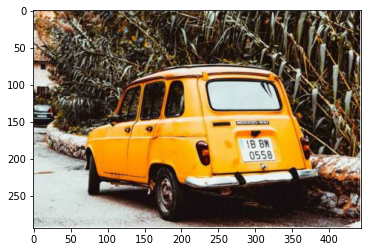

In [73]:
# 1.- Importamos las librerias necesarias.
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import io # Dado que se esta trayendo una imagen externa se agrega la libreria para descargar la imagen

# 2.- Leemos o descargamos la imagen y luego la mostramos.
url = "https://drive.google.com/uc?export=view&id=1oaorsXXTrbpsbteZM3IiQaczOPm10hsy"
image = io.imread(url) 
plt.imshow(image) # La imprimimos.

# 3.- Imprimos las dimensiones de la imagen, al ser una imagen a color tendremos 3 canales.
print('Dimensiones de la imagen ', image.shape)

# 4.- Ahora vamos a verificar la altura y el ancho de la imagen; 
# de donde de la ejecucion anterior el primer valor corresponde a la altura y el segundo al ancho.
print('Altura = ', int(image.shape[0]), ' en pixels')
print('Ancho = ', int(image.shape[1]), ' en pixels')

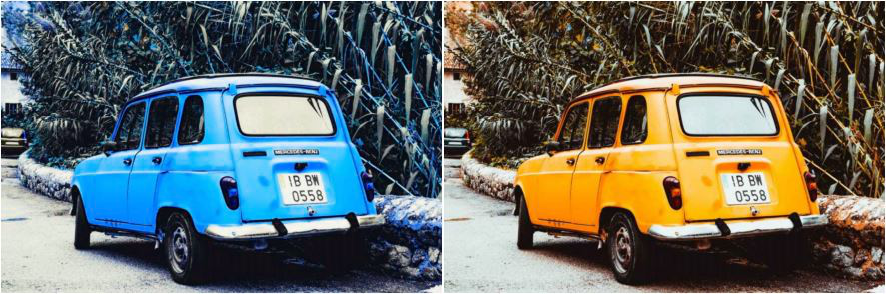

In [81]:
# 5.- En general OpenCV usa BGR en lugar de RGB.
from google.colab.patches import cv2_imshow
# A la izquierda la imagen 'original' interpretada por OpenCV y a la derecha la misma imagen con la correccion de color BGR2RGB.
copy_img = np.copy(image)
image_filtered = cv2.cvtColor(copy_img, cv2.COLOR_BGR2RGB)
final_frame = cv2.hconcat((copy_img, image_filtered))
cv2_imshow(final_frame)

> ⚠️ Es importante tener en cuenta la manera en que OpenCV maneja los colores con BGR para no mezclarlo con otras librerias.

Auto en escala de grises


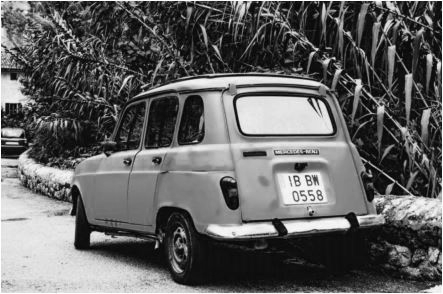

In [80]:
# Convertir de BGR a Escala de grises
copy_img = np.copy(image)
image_filtered = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)
print('Auto en escala de grises.')
cv2_imshow(image_filtered)

#### Convirtiendo de RGB A HSV

Auto en HSV.


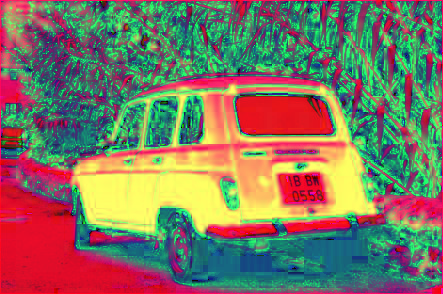

In [85]:
# Convertir de BGR a Escala de HSV
copy_img = np.copy(image)
hsv_img = cv2.cvtColor(copy_img, cv2.COLOR_BGR2HSV)
print('Auto en HSV.')
cv2_imshow(hsv_img)

Text(0.5, 1.0, 'Hue = 0')

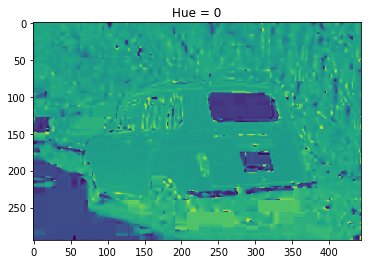

In [88]:
# Una vez se ha modificado nuestra imagen a formato HSV podemos trabajar directamente con cada uno de sus canales.

# Por ejemplo poniendo 0 en hsv_img[:, :, 0]
plt.imshow(hsv_img[:, :, 0])
plt.title('Hue channel')

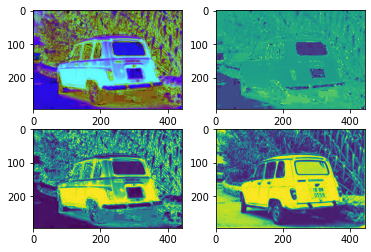

In [94]:
fig = plt.figure()

# Imagen normal
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(hsv_img)

# canal H
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(hsv_img[:, :, 0])

# canal S
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(hsv_img[:, :, 1])

# canal V
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(hsv_img[:, :, 2])

Nosotros tambien podemos separar los canales RGB de manera independiente de la siguiente manera.

In [98]:
img2 = np.copy(image)
B, G, R = cv2.split(img2)

print("El valor de R es ", R.shape)
print("El valor de G es ", G.shape)
print("El valor de B es ", B.shape)

El valor de R es  (294, 443)
El valor de G es  (294, 443)
El valor de B es  (294, 443)


Auto en HSV.


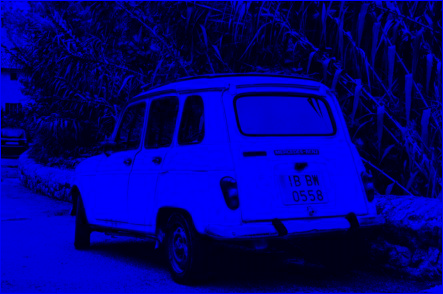

In [100]:
# Mostrar unicamente el aspectro B
zeros = np.zeros( image.shape[: 2], dtype = "uint8")

print('Auto en HSV.')
cv2_imshow(cv2.merge([B, zeros, zeros]))

Auto en HSV.


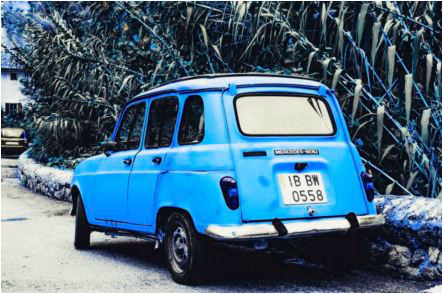

In [101]:
# Aspectro BGR
zeros = np.zeros( image.shape[: 2], dtype = "uint8")

print('Auto en HSV.')
cv2_imshow(cv2.merge([B, G, R]))

Auto en HSV.


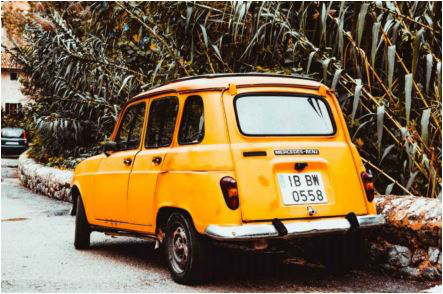

In [102]:
# Aspectro RGB
zeros = np.zeros( image.shape[: 2], dtype = "uint8")

print('Auto en HSV.')
cv2_imshow(cv2.merge([R, G, B]))

Auto en HSV.


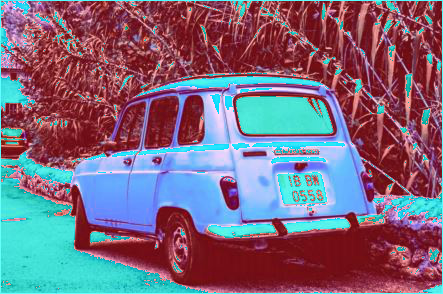

In [104]:
# Aspectro RGB con algo mas de color rojo agregado.
zeros = np.zeros( image.shape[: 2], dtype = "uint8")

print('Auto en HSV.')
cv2_imshow(cv2.merge([B, G, R+100]))